## DFO Si Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
from salishsea_tools import geo_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle
import cmocean

mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=12)
mpl.rc('axes', labelsize=12)
mpl.rc('figure', titlesize=12)
mpl.rc('font', size=12)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = ','.join(r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 '''.split()))
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][:,:,:,:]
    gdept=mesh.variables['gdept_1d'][0,:]
    e3t0=mesh.variables['e3t_0'][0,:,:,:]
bathy=np.sum(e3t0,0)
with nc.Dataset('/results/SalishSea/hindcast.201812/01jan16/SalishSea_1h_20160101_20160101_ptrc_T.nc') as ftemp:
        bounds=np.copy(ftemp.variables['deptht_bounds'][:,:])

In [3]:
#d1=et._gridHoriz(df.loc[df.Z>150].copy(deep=True),tmask,navlon,navlat,wrapSearch=False,resetIndex=True);
d1=pickle.load(open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataDFO_k.pkl','rb'))

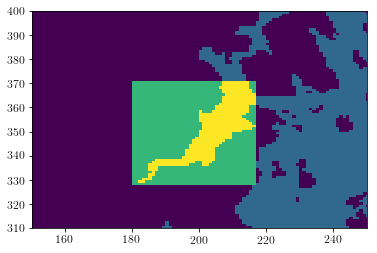

In [4]:
# drop Saanich Inlet
tmask2=np.copy(tmask[0,0,:,:])
tmask2[328:371,180:217]=tmask[0,0,328:371,180:217]+2
plt.pcolormesh(tmask2)
plt.xlim(150,250)
plt.ylim(310,400)
d1.drop(d1.loc[(d1.i>=180)&(d1.i<217)&(d1.j>=328)&(d1.j<371)].index.values,inplace=True)
# also drop east side Vancouver Island points:
d1.drop(d1.loc[(d1.i<10)&(d1.j>=460)&(d1.j<480)].index.values,inplace=True)

In [5]:
d1['YD']=[(dt.datetime(int(yy),int(mm),int(dd))-dt.datetime(int(yy),1,1)).total_seconds()/(24*3600) for yy,mm,dd in zip(d1['Year'].values,d1['Month'].values,d1['Day'].values)]

In [6]:
times=np.array([dt.datetime(int(yy),int(mm),int(dd)) for yy,mm,dd in zip(d1.Year,d1.Month,d1.Day)])

In [7]:
dfVic=d1.loc[(d1.Lat>48.15)&(d1.Lat<48.4)&(d1.Lon>-123.3)&(d1.Lon<-123.1)]

In [8]:
dfW=d1.loc[(d1.Lat>48.15)&(d1.Lat<49)&(d1.Lon>-125)&(d1.Lon<-124.5)]

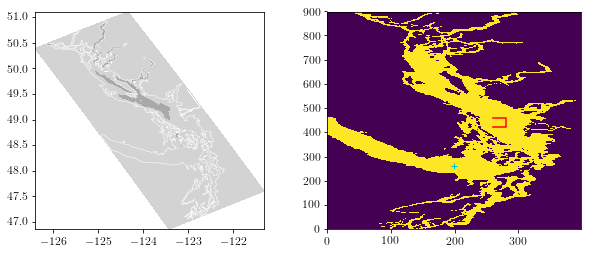

In [9]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
#kk=30 #36,34,32,30
simin=40
simax=80
for mon in range(1,2):
    iax=ax[0];#ax[mon-1,1]
    kk=34
    iax.contour(navlon,navlat,tmask[0,0,:,:],levels=(.5,),linewidths=(.5,),colors=('w','w','w'))
    iax.contourf(navlon,navlat,tmask[0,kk,:,:],levels=(0,.5,1.5),colors=('lightgray','darkgray','k'))
    viz_tools.set_aspect(iax,coords='map')
    d1bath=np.array([bathy[j,i] for i,j in zip(d1['i'],d1['j'])])
    df0=d1.loc[(d1.Lon<-123.3)&(d1.Lon>-123.6)&(d1.Lat<49.2)&(d1.Lat>48.85)&(d1.Si>=0)&(d1bath>400)]
    #lo,la,mm=binmean(df0,latEdges=np.linspace(47,51,31),lonEdges=np.linspace(-126,-122,41))
    #iax.pcolormesh(lo,la,np.ma.masked_where(np.isnan(mm),mm))
    #mesh=iax.scatter(lo,la,c=mm,s=6,vmin=simin,vmax=simax,zorder=2)

ax[1].pcolormesh(tmask[0,0,:,:])
ax[1].plot((260,280,280,260),(420,420,460,460),'r-')
ax[1].plot((199),(262),'c+')

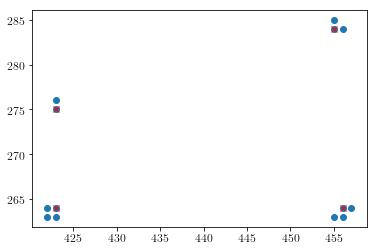

In [10]:
r=np.array(df0[['j','i']].drop_duplicates())
plt.plot(r[:,0],r[:,1],'o')
plt.plot(423,264,'rx')
plt.plot(423,275,'rx')
plt.plot(455,284,'rx')
plt.plot(456,264,'rx')

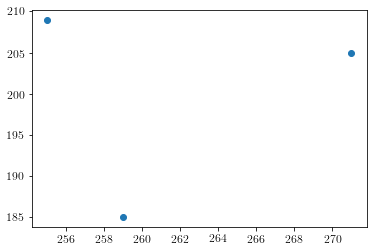

In [11]:
r=np.array(dfVic[['j','i']].drop_duplicates())
plt.plot(r[:,0],r[:,1],'o')
#plt.plot(423,264,'rx')
#plt.plot(423,275,'rx')
#plt.plot(455,284,'rx')
#plt.plot(456,264,'rx')
# use 262,199

array([[413,   7],
       [394,  31]])

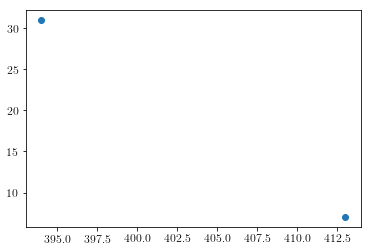

In [14]:
r=np.array(dfW[['j','i']].drop_duplicates())
plt.plot(r[:,0],r[:,1],'o')
r

In [24]:
j,i=geo_tools.find_closest_model_point(-123.426075,49.040138,navlon,navlat)
j,i

(424, 266)

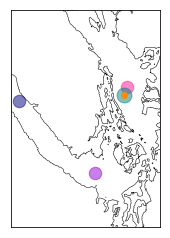

In [40]:
#map
fig,ax=plt.subplots(1,1,figsize=(3,4))
ax.contour(tmask[0,0,:,:],levels=(.5,),linewidths=(.5,),colors=('k',))
ax.plot(20,412,'.',color='navy',ms=25,alpha=.5)
ax.plot(199,262,'.',color='darkviolet',ms=25,alpha=.5)
ax.plot(273,440,'.',color='deeppink',ms=25,alpha=.5)
ax.plot(i,j,'.',color='teal',ms=30,alpha=.5)
ax.plot(i,j,'.',color='darkorange',ms=12,alpha=1)
ax.set_xlim(0,350)
ax.set_ylim(150,600)
viz_tools.set_aspect(ax)
ax.xaxis.set_visible(None)
ax.yaxis.set_visible(None)
fig.savefig('/home/eolson/pyCode/notebooks/figs/smallMapIUGG.png',dpi=300)

In [12]:
mod_basedir= '/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2018,1,1)
flen=1
namfmt='nowcast'
#varmap={'N':'nitrate','Si':'silicon','Ammonium':'ammonium'}
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T','vosaline':'grid_T','votemper':'grid_T'}
#gridmap={'nitrate':'tmask','silicon':'tmask','ammonium':'tmask'}
fdict={'ptrc_T':24,'grid_T':24}
flist=dict()
for ift in fdict.keys():
    flist[ift]=et.index_model_files(start_date,end_date,mod_basedir,namfmt,flen,ift,fdict[ift])
    #SalishSea_1d_20150601_20150601_ptrc_T.nc

In [13]:
jV,iV=geo_tools.find_closest_model_point(-123.426075,49.040138,navlon,navlat)

In [15]:
CT=list()
SA=list()
Chl=list()
dSi=list()
dSiVic=list()
dSiW=list()
bSi=list()
diat=list()
tt=list()
for ifile in flist['grid_T']['paths']:
    #Venus Central Node
    #LATITUDE:     49.040138                         / Latitude North
    #LONGITUDE:  -123.426075                         / Longitude East
    #DEPTH:       300.0  
    with nc.Dataset(ifile) as f:
        CT.append(f.variables['votemper'][0,34,jV,iV])
        SA.append(f.variables['vosaline'][0,34,jV,iV])
        tt.append(dt.datetime(1900,1,1)+dt.timedelta(seconds=f.variables['time_centered'][0]))
for ifile in flist['ptrc_T']['paths']:
    with nc.Dataset(ifile) as f:
        Chl.append(2*np.mean(np.mean(np.mean(f.variables['diatoms'][0,:3,420:460,260:280]+\
                                      f.variables['ciliates'][0,:3,420:460,260:280]+\
                                      f.variables['flagellates'][0,:3,420:460,260:280],2),1),0))
        dSi.append(f.variables['silicon'][0,:,440,273])
        dSiVic.append(f.variables['silicon'][0,:,262,199])
        dSiW.append(f.variables['silicon'][0,:,412,20])
        bSi.append(f.variables['biogenic_silicon'][0,:,440,273])
        diat.append(f.variables['diatoms'][0,:,440,273])
CT=np.array(CT)
SA=np.array(SA)
tt=np.array(tt)
Chl=np.array(Chl)
dSi=np.array(dSi)
dSiVic=np.array(dSiVic)
dSiW=np.array(dSiW)
bSi=np.array(bSi)
diat=np.array(diat)

In [16]:
355*3

1065

In [17]:
# load ONC VENUS data
dfV=pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/VENUS/search9384608/'+\
                'Central_StraitofGeorgiaVENUSInstrumentPlatform_CTD_20080924T200000Z_20190702T000000Z-clean_avg1hour.csv',
                skiprows=174,header=None,names=("TimeUTC", "ConductivitySm", "ConductivityQCFlag", "ConductivityCount", 
                                                "Density_kgm3","DensityQCFlag", "DensityCount", "Depth_m", "DepthQCFlag", "DepthCount", 
                                                "PracticalSalinity_psu", "PracticalSalinityQCFlag", "PracticalSalinityCount", 
                                                "Pressure_dbar", "PressureQCFlag", "PressureCount", "Sigmat_kgm3", "SigmatQCFlag", "SigmatCount", 
                                                "Sigmatheta_0dbar_kgm3", "SigmathetaQCFlag", "SigmathetaCount", 
                                                "SoundSpeed_ms", "SoundSpeedQCFlag", "SoundSpeedCount", 
                                                "Temperature_C", "TemperatureQCFlag" , "TemperatureCount"),na_values=' NaN')

In [18]:
timesV=np.array([dt.datetime.strptime(ii[0:19],'%Y-%m-%dT%H:%M:%S') for ii in dfV['TimeUTC']])

In [19]:
z=300.0
lon=-123.426075
lat=49.040138
p=gsw.p_from_z(-1*z,lat)
dfV['SA']=gsw.SA_from_SP(dfV['PracticalSalinity_psu'],p,lon,lat)
dfV['CT']=gsw.CT_from_t(dfV['SA'],dfV['Temperature_C'],p)

In [20]:
# load daily ferry Chl
dfCh=pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/ferryChl_1d/search9397468/'+\
                'BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20120509T000000Z_20190703T000000Z-clean_avg1day.csv',
                skiprows=102,header=None,names=("TimeUTC", "CDOMFluor_ppb", "CDOMFluorQCFlag", "CDOMFluorCount", 
                     "Chl_ugl", "ChlQCFlag", "ChlCount", "Turbidity_NTU", "TurbidityQCFlag","TurbidityCount", 
                     "Latitude_deg", "LatitudeQCFlag", "LatitudeCount", "Longitude_deg", "LongitudeQCFlag", "LongitudeCount",
                     "Pitch_deg", "PitchQCFlag" , "PitchCount", "Roll_deg", "RollQCFlag" , "RollCount", 
                     "TrueHeading_deg", "TrueHeadingQCFlag" , "TrueHeadingCount"),na_values=' NaN')
    

In [21]:
timesCh=np.array([dt.datetime.strptime(ii[0:19],'%Y-%m-%dT%H:%M:%S') for ii in dfCh['TimeUTC']])

In [22]:
df0=d1.loc[(d1.Lon<-123.3)&(d1.Lon>-123.6)&(d1.Lat<49.2)&(d1.Lat>48.85)&(d1.Si>=0)&(d1bath>400)]
times0=times[(d1.Lon<-123.3)&(d1.Lon>-123.6)&(d1.Lat<49.2)&(d1.Lat>48.85)&(d1.Si>=0)&(d1bath>400)]

(735964.0, 736695.0)

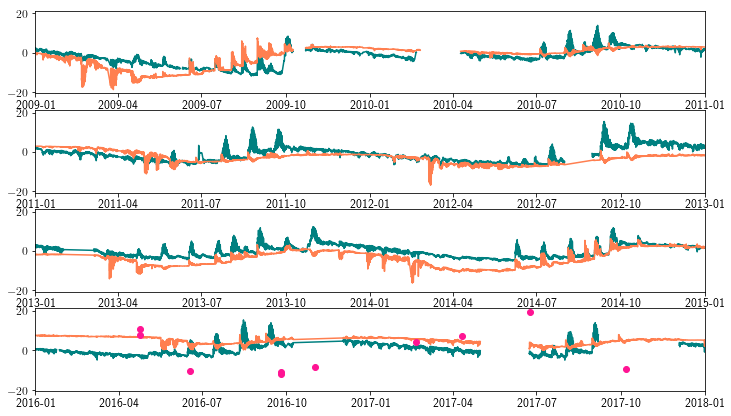

In [23]:
fig,axs=plt.subplots(4,1,figsize=(12,7))
ik=36
ax=axs[0]
ax.plot(timesV,20*(dfV['PracticalSalinity_psu']-np.nanmean(dfV['PracticalSalinity_psu'])),'-',color='teal')
ax.plot(timesV,10*(dfV['Temperature_C']-np.nanmean(dfV['Temperature_C'])),'-',color='coral')
ax.plot(times0[df0.k==ik],df0.loc[df0.k==ik,['Si']]-np.nanmean(df0.loc[df0.k==ik,['Si']]),'o',color='deeppink')
ax.set_xlim((dt.datetime(2009,1,1),dt.datetime(2011,1,1)))
ax=axs[1]
ax.plot(timesV,20*(dfV['PracticalSalinity_psu']-np.nanmean(dfV['PracticalSalinity_psu'])),'-',color='teal')
ax.plot(timesV,10*(dfV['Temperature_C']-np.nanmean(dfV['Temperature_C'])),'-',color='coral')
ax.plot(times0[df0.k==ik],df0.loc[df0.k==ik,['Si']]-np.nanmean(df0.loc[df0.k==ik,['Si']]),'o',color='deeppink')
ax.set_xlim((dt.datetime(2011,1,1),dt.datetime(2013,1,1)))
ax=axs[2]
ax.plot(timesV,20*(dfV['PracticalSalinity_psu']-np.nanmean(dfV['PracticalSalinity_psu'])),'-',color='teal')
ax.plot(timesV,10*(dfV['Temperature_C']-np.nanmean(dfV['Temperature_C'])),'-',color='coral')
ax.plot(times0[df0.k==ik],df0.loc[df0.k==ik,['Si']]-np.nanmean(df0.loc[df0.k==ik,['Si']]),'o',color='deeppink')
ax.set_xlim((dt.datetime(2013,1,1),dt.datetime(2015,1,1)))
ax=axs[3]
ax.plot(timesV,20*(dfV['PracticalSalinity_psu']-np.nanmean(dfV['PracticalSalinity_psu'])),'-',color='teal')
ax.plot(timesV,10*(dfV['Temperature_C']-np.nanmean(dfV['Temperature_C'])),'-',color='coral')
ax.plot(times0[df0.k==ik],df0.loc[df0.k==ik,['Si']]-np.nanmean(df0.loc[df0.k==ik,['Si']]),'o',color='deeppink')
ax.set_xlim((dt.datetime(2016,1,1),dt.datetime(2018,1,1)))

In [24]:
timesVic=np.array([dt.datetime(int(yy),int(mm),int(dd)) for yy,mm,dd in zip(dfVic.Year,dfVic.Month,dfVic.Day)])

In [25]:
timesW=np.array([dt.datetime(int(yy),int(mm),int(dd)) for yy,mm,dd in zip(dfW.Year,dfW.Month,dfW.Day)])

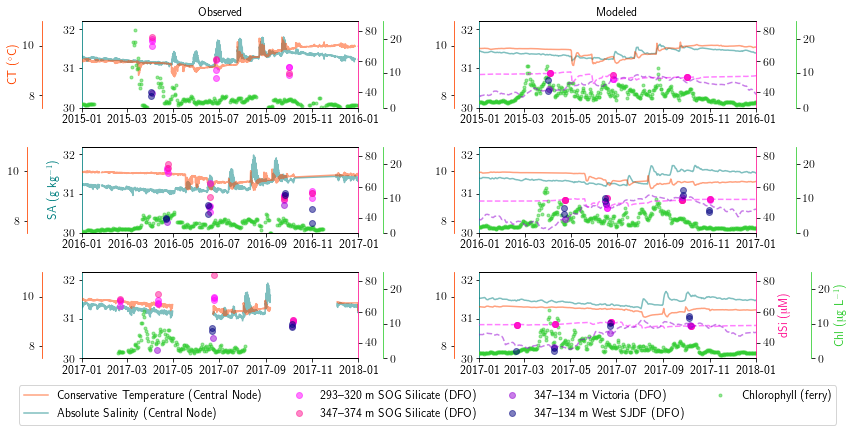

In [58]:
Tcol='orangered'
Scol='teal'
Sicol='deeppink'
Sicol2='fuchsia'
Sicol3='darkviolet'
Sicol4='navy'
Chcol='limegreen'
fig=plt.figure(figsize=(12,6))
h=.2
w=.32
axPos=((.1,.75,w,h),(.1,.46,w,h),(.1,.17,w,h))
axPos2=((.56,.75,w,h),(.56,.46,w,h),(.56,.17,w,h))
axSi=dict(); axS=dict(); axT=dict(); axCh=dict()
for i in range(0,3):
    axS[i]=fig.add_axes(axPos[i])
    axT[i]=axS[i].twinx()
    axT[i].yaxis.tick_left()
    axT[i].spines['left'].set_position(('outward', 40))
    axT[i].spines['left'].set_color(Tcol)
    axCh[i]=axS[i].twinx()
    axCh[i].spines['right'].set_position(('outward', 25))
    axCh[i].spines['right'].set_color(Chcol)
    axSi[i]=axS[i].twinx()
    axSi[i].spines['right'].set_color(Sicol)
    axS[i].spines['left'].set_color(Scol)
    pSi2,=axSi[i].plot(times0[df0.k==(ik-2)],df0.loc[df0.k==(ik-2),['Si']],'o',color=Sicol2,alpha=.5)
    pSi,=axSi[i].plot(times0[df0.k==ik],df0.loc[df0.k==ik,['Si']],'o',color=Sicol,alpha=.5)
    pSiV,=axSi[i].plot(timesVic[dfVic.k==27],dfVic.loc[dfVic.k==27,['Si']],'o',color=Sicol3,alpha=.5)
    pSiW,=axSi[i].plot(timesW[dfW.k==27],dfW.loc[dfW.k==27,['Si']],'o',color=Sicol4,alpha=.5)
    pS,=axS[i].plot(timesV,dfV['SA'],'-',color=Scol,alpha=.5)
    pT,=axT[i].plot(timesV,dfV['CT'],'-',color=Tcol,alpha=.5)
    pCh,=axCh[i].plot(timesCh,dfCh['Chl_ugl'],'.',color=Chcol,alpha=.5)
    axSi[i].set_ylim((30,85))
    axCh[i].set_ylim((0,25))
    axSi[i].spines['left'].set_visible(False)
    axCh[i].spines['left'].set_visible(False)
    axS[i].spines['right'].set_visible(False)
    axT[i].spines['right'].set_visible(False)
    axSi[i].set_ylim((30,86))
    axCh[i].set_ylim((0,25))
    axS[i].set_ylim((30,32.2))
    axT[i].set_ylim((7.5,11))
axS[0].set_xlim((dt.datetime(2015,1,1),dt.datetime(2016,1,1)))
axS[1].set_xlim((dt.datetime(2016,1,1),dt.datetime(2017,1,1)))
axS[2].set_xlim((dt.datetime(2017,1,1),dt.datetime(2018,1,1)))
axT[0].yaxis.set_label_position("left")
axT[0].set_ylabel('CT ($^{\circ}$C)',color=Tcol)
axT[1].spines['left'].set_position(('outward', 55))
axS[1].set_ylabel('SA (g kg$^{-1}$)',color=Scol)
#axSi[2].set_ylabel('dSi ($\muup$M)',color=Sicol)
#axCh[2].spines['right'].set_position(('outward', 55))
#axCh[2].set_ylabel('Chl ($\muup$g L$^{-1}$)',color=Chcol)
axT[0].set_title('Observed')
plt.legend((pT,pS,pSi2,pSi,pSiV,pSiW,pCh),('Conservative Temperature (Central Node)','Absolute Salinity (Central Node)', 
                str(int(bounds[ik-2,0]))+'--'+str(int(bounds[ik-2,1]))+' m SOG Silicate (DFO)',
                str(int(bounds[ik,0]))+'--'+str(int(bounds[ik,1]))+' m SOG Silicate (DFO)',
                                 str(int(bounds[ik,0]))+'--'+str(int(bounds[27,1]))+' m Victoria (DFO)',
                                 str(int(bounds[ik,0]))+'--'+str(int(bounds[27,1]))+' m West SJDF (DFO)',
                                 'Chlorophyll (ferry)'),loc=8,ncol=4,bbox_to_anchor=[1.25,-.84,0,0])
for i in range(0,3):
    axS[i]=fig.add_axes(axPos2[i])
    axT[i]=axS[i].twinx()
    axT[i].yaxis.tick_left()
    axT[i].spines['left'].set_position(('outward', 25))
    axT[i].spines['left'].set_color(Tcol)
    axCh[i]=axS[i].twinx()
    axCh[i].spines['right'].set_position(('outward', 40))
    axCh[i].spines['right'].set_color(Chcol)
    axSi[i]=axS[i].twinx()
    axSi[i].spines['right'].set_color(Sicol)
    axS[i].spines['left'].set_color(Scol)
    pSi2,=axSi[i].plot(times0[df0.k==(ik-2)],df0.loc[df0.k==(ik-2),['mod_silicon']],'o',color=Sicol2,alpha=.5)
    pSi,=axSi[i].plot(times0[df0.k==ik],df0.loc[df0.k==ik,['mod_silicon']],'o',color=Sicol,alpha=.5)
    pSiV,=axSi[i].plot(timesVic[dfVic.k==27],dfVic.loc[dfVic.k==27,['mod_silicon']],'o',color=Sicol3,alpha=.5)
    pSiW,=axSi[i].plot(timesW[dfW.k==27],dfW.loc[dfW.k==27,['mod_silicon']],'o',color=Sicol4,alpha=.5)
    axSi[i].plot(tt,dSi[:,ik-3],'--',color=Sicol2,alpha=.5)
    axSi[i].plot(tt,dSiVic[:,27],'--',color=Sicol3,alpha=.5)
    pS,=axS[i].plot(tt,SA,'-',color=Scol,alpha=.5)
    pT,=axT[i].plot(tt,CT,'-',color=Tcol,alpha=.5)
    pCh,=axCh[i].plot(tt,Chl*1.7/2,'.',color=Chcol,alpha=.5)
    axSi[i].set_ylim((30,86))
    axCh[i].set_ylim((0,25))
    axS[i].set_ylim((30,32.2))
    axT[i].set_ylim((7.5,11))
    axSi[i].spines['left'].set_visible(False)
    axCh[i].spines['left'].set_visible(False)
    axS[i].spines['right'].set_visible(False)
    axT[i].spines['right'].set_visible(False)
axS[0].set_xlim((dt.datetime(2015,1,1),dt.datetime(2016,1,1)))
axS[1].set_xlim((dt.datetime(2016,1,1),dt.datetime(2017,1,1)))
axS[2].set_xlim((dt.datetime(2017,1,1),dt.datetime(2018,1,1)))
axT[0].set_title('Modeled')

#axT[0].yaxis.set_label_position("left")
#axT[0].set_ylabel('CT ($^{\circ}$C)',color=Tcol)
#axT[1].spines['left'].set_position(('outward', 55))
#axS[1].set_ylabel('SA (g kg$^{-1}$)',color=Scol)
axSi[2].set_ylabel('dSi ($\muup$M)',color=Sicol)
axCh[2].spines['right'].set_position(('outward', 55))
axCh[2].set_ylabel('Chl ($\muup$g L$^{-1}$)',color=Chcol)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/dfoDWRMod.png',dpi=300,transparent=True)

In [ ]:
dSi[:,ik-3]

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
simin=20; simax=60
m1=ax.scatter(timesVic,dfVic.k,c=dfVic.Si,s=6,vmin=simin,vmax=simax)
fig.colorbar(m1)
ax.set_xlim((dt.datetime(1999,1,1),dt.datetime(2019,1,1)))

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
ii=dfVic.k==27
ax.plot(timesVic[ii],dfVic.Si[ii],'k.')
ax.set_xlim((dt.datetime(1999,1,1),dt.datetime(2019,1,1)))

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
simin=20; simax=60
m1=ax.scatter(timesW,dfW.k,c=dfW.Si,s=6,vmin=simin,vmax=simax)
fig.colorbar(m1)
ax.set_xlim((dt.datetime(1999,1,1),dt.datetime(2019,1,1)))

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
ii=dfW.k==27
ax.plot(timesW[ii],dfW.Si[ii],'k.')
ax.set_xlim((dt.datetime(1999,1,1),dt.datetime(2019,1,1)))

In [ ]:
ik=36
ax=axs[0]
ax.plot(timesV,20*(dfV['PracticalSalinity_psu']-np.nanmean(dfV['PracticalSalinity_psu'])),'-',color='teal')
ax.plot(timesV,10*(dfV['Temperature_C']-np.nanmean(dfV['Temperature_C'])),'-',color='coral')
ax.plot(times[df0.k==ik],df0.loc[df0.k==ik,['Si']]-np.nanmean(df0.loc[df0.k==ik,['Si']]),'o',color='deeppink')
ax.set_xlim((dt.datetime(2009,1,1),dt.datetime(2011,1,1)))
ax=axs[1]
ax.plot(timesV,20*(dfV['PracticalSalinity_psu']-np.nanmean(dfV['PracticalSalinity_psu'])),'-',color='teal')
ax.plot(timesV,10*(dfV['Temperature_C']-np.nanmean(dfV['Temperature_C'])),'-',color='coral')
ax.plot(times[df0.k==ik],df0.loc[df0.k==ik,['Si']]-np.nanmean(df0.loc[df0.k==ik,['Si']]),'o',color='deeppink')
ax.set_xlim((dt.datetime(2011,1,1),dt.datetime(2013,1,1)))
ax=axs[2]
ax.plot(timesV,20*(dfV['PracticalSalinity_psu']-np.nanmean(dfV['PracticalSalinity_psu'])),'-',color='teal')
ax.plot(timesV,10*(dfV['Temperature_C']-np.nanmean(dfV['Temperature_C'])),'-',color='coral')
ax.plot(times[df0.k==ik],df0.loc[df0.k==ik,['Si']]-np.nanmean(df0.loc[df0.k==ik,['Si']]),'o',color='deeppink')
ax.set_xlim((dt.datetime(2013,1,1),dt.datetime(2015,1,1)))
ax=axs[3]
ax.plot(timesV,20*(dfV['PracticalSalinity_psu']-np.nanmean(dfV['PracticalSalinity_psu'])),'-',color='teal')
ax.plot(timesV,10*(dfV['Temperature_C']-np.nanmean(dfV['Temperature_C'])),'-',color='coral')
ax.plot(times[df0.k==ik],df0.loc[df0.k==ik,['Si']]-np.nanmean(df0.loc[df0.k==ik,['Si']]),'o',color='deeppink')
ax.set_xlim((dt.datetime(2015,1,1),dt.datetime(2017,1,1)))

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(16,4))
fig.subplots_adjust(wspace=.5)
col=('midnightblue','steelblue','darkturquoise','lime',
     'seagreen','darkkhaki','darkorange','saddlebrown','firebrick',
     'lightcoral','fuchsia','mediumorchid','blueviolet')
ps=dict()
for valm, groupedm in df0.groupby(['Month']):
    ik=37
    ax[1].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[2].plot(groupedm.loc[groupedm.k==ik,['ConsT']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    means=groupedm.groupby(['k']).agg({'Si':np.mean,'Z':np.mean})
    stds=groupedm.groupby(['k']).agg({'Si':np.std})
    ns=groupedm.groupby(['k'])['Si'].count()
    ps[int(valm)],=ax[0].plot(means['Si'][ns>2],means['Z'][ns>2],'-',color=col[int(valm)],
               label=str(int(valm)))
    ax[0].errorbar(means['Si'][ns>2],means['Z'][ns>2],xerr=stds['Si'][ns>2],color=col[int(valm)])
ax[0].legend(handles=[ps[1],ps[2],ps[3],ps[4],ps[5],ps[6],ps[7],ps[8],ps[9],ps[10],ps[11],ps[12]],
         bbox_to_anchor=(1.3, 1.0))
ax[0].set_ylim(400,50)
ax[0].set_xlim(30,100)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('dSi ($\muup$M Si)')
ax[1].set_ylabel('dSi ($\muup$M Si)')
ax[1].set_title('Si vs SA, '+str(int(bounds[ik,0]))+'m$<$Z$<$'+str(int(bounds[ik,1]))+'m')
ax[1].set_ylabel('dSi ($\muup$M Si)')
ax[1].set_title('Si vs CT, '+str(int(bounds[ik,0]))+'m$<$Z$<$'+str(int(bounds[ik,1]))+'m')

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(20,4))
fig.subplots_adjust(wspace=.5)
col=('midnightblue','steelblue','darkturquoise','lime',
     'seagreen','darkkhaki','darkorange','saddlebrown','firebrick',
     'lightcoral','fuchsia','mediumorchid','blueviolet')
ps=dict()
for valm, groupedm in df0.groupby(['Month']):
    ik=36
    ax[1].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[2].plot(groupedm.loc[groupedm.k==ik,['ConsT']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[3].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['ConsT']],'o',color=col[int(valm)],alpha=1)
    means=groupedm.groupby(['k']).agg({'Si':np.mean,'Z':np.mean})
    stds=groupedm.groupby(['k']).agg({'Si':np.std})
    ns=groupedm.groupby(['k'])['Si'].count()
    ps[int(valm)],=ax[0].plot(means['Si'][ns>2],means['Z'][ns>2],'-',color=col[int(valm)],
               label=str(int(valm)))
    ax[0].errorbar(means['Si'][ns>2],means['Z'][ns>2],xerr=stds['Si'][ns>2],color=col[int(valm)])
ax[0].legend(handles=[ps[1],ps[2],ps[3],ps[4],ps[5],ps[6],ps[7],ps[8],ps[9],ps[10],ps[11],ps[12]],
         bbox_to_anchor=(1.3, 1.0))
ax[0].set_ylim(400,50)
ax[0].set_xlim(30,100)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('dSi ($\muup$M Si)')
ax[1].set_ylabel('dSi ($\muup$M Si)')
ax[1].set_title('Si vs SA, '+str(int(bounds[ik,0]))+'m$<$Z$<$'+str(int(bounds[ik,1]))+'m')

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(20,4))
fig.subplots_adjust(wspace=.5)
col=('midnightblue','steelblue','darkturquoise','lime',
     'seagreen','darkkhaki','darkorange','saddlebrown','firebrick',
     'lightcoral','fuchsia','mediumorchid','blueviolet')
ps=dict()
for valm, groupedm in df0.groupby(['Month']):
    ik=34
    ax[1].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[2].plot(groupedm.loc[groupedm.k==ik,['ConsT']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[3].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['ConsT']],'o',color=col[int(valm)],alpha=1)
    means=groupedm.groupby(['k']).agg({'Si':np.mean,'Z':np.mean})
    stds=groupedm.groupby(['k']).agg({'Si':np.std})
    ns=groupedm.groupby(['k'])['Si'].count()
    ps[int(valm)],=ax[0].plot(means['Si'][ns>2],means['Z'][ns>2],'-',color=col[int(valm)],
               label=str(int(valm)))
    ax[0].errorbar(means['Si'][ns>2],means['Z'][ns>2],xerr=stds['Si'][ns>2],color=col[int(valm)])
ax[0].legend(handles=[ps[1],ps[2],ps[3],ps[4],ps[5],ps[6],ps[7],ps[8],ps[9],ps[10],ps[11],ps[12]],
         bbox_to_anchor=(1.3, 1.0))
ax[0].set_ylim(400,50)
ax[0].set_xlim(30,100)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('dSi ($\muup$M Si)')
ax[1].set_ylabel('dSi ($\muup$M Si)')
ax[1].set_title('Si vs SA, '+str(int(bounds[ik,0]))+'m$<$Z$<$'+str(int(bounds[ik,1]))+'m')

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(20,4))
fig.subplots_adjust(wspace=.5)
col=('midnightblue','steelblue','darkturquoise','lime',
     'seagreen','darkkhaki','darkorange','saddlebrown','firebrick',
     'lightcoral','fuchsia','mediumorchid','blueviolet')
ps=dict()
for valm, groupedm in df0.groupby(['Month']):
    ik=32
    ax[1].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[2].plot(groupedm.loc[groupedm.k==ik,['ConsT']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[3].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['ConsT']],'o',color=col[int(valm)],alpha=1)
    means=groupedm.groupby(['k']).agg({'Si':np.mean,'Z':np.mean})
    stds=groupedm.groupby(['k']).agg({'Si':np.std})
    ns=groupedm.groupby(['k'])['Si'].count()
    ps[int(valm)],=ax[0].plot(means['Si'][ns>2],means['Z'][ns>2],'-',color=col[int(valm)],
               label=str(int(valm)))
    ax[0].errorbar(means['Si'][ns>2],means['Z'][ns>2],xerr=stds['Si'][ns>2],color=col[int(valm)])
ax[0].legend(handles=[ps[1],ps[2],ps[3],ps[4],ps[5],ps[6],ps[7],ps[8],ps[9],ps[10],ps[11],ps[12]],
         bbox_to_anchor=(1.3, 1.0))
ax[0].set_ylim(400,50)
ax[0].set_xlim(30,100)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('dSi ($\muup$M Si)')
ax[1].set_ylabel('dSi ($\muup$M Si)')
ax[1].set_title('Si vs SA, '+str(int(bounds[ik,0]))+'m$<$Z$<$'+str(int(bounds[ik,1]))+'m')

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(20,4))
fig.subplots_adjust(wspace=.5)
col=('midnightblue','steelblue','darkturquoise','lime',
     'seagreen','darkkhaki','darkorange','saddlebrown','firebrick',
     'lightcoral','fuchsia','mediumorchid','blueviolet')
ps=dict()
for valm, groupedm in df0.groupby(['Month']):
    ik=30
    ax[1].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[2].plot(groupedm.loc[groupedm.k==ik,['ConsT']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[3].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['ConsT']],'o',color=col[int(valm)],alpha=1)
    means=groupedm.groupby(['k']).agg({'Si':np.mean,'Z':np.mean})
    stds=groupedm.groupby(['k']).agg({'Si':np.std})
    ns=groupedm.groupby(['k'])['Si'].count()
    ps[int(valm)],=ax[0].plot(means['Si'][ns>2],means['Z'][ns>2],'-',color=col[int(valm)],
               label=str(int(valm)))
    ax[0].errorbar(means['Si'][ns>2],means['Z'][ns>2],xerr=stds['Si'][ns>2],color=col[int(valm)])
ax[0].legend(handles=[ps[1],ps[2],ps[3],ps[4],ps[5],ps[6],ps[7],ps[8],ps[9],ps[10],ps[11],ps[12]],
         bbox_to_anchor=(1.3, 1.0))
ax[0].set_ylim(400,50)
ax[0].set_xlim(30,100)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('dSi ($\muup$M Si)')
ax[1].set_ylabel('dSi ($\muup$M Si)')
ax[1].set_title('Si vs SA, '+str(int(bounds[ik,0]))+'m$<$Z$<$'+str(int(bounds[ik,1]))+'m')

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(20,4))
fig.subplots_adjust(wspace=.5)
col=('midnightblue','steelblue','darkturquoise','lime',
     'seagreen','darkkhaki','darkorange','saddlebrown','firebrick',
     'lightcoral','fuchsia','mediumorchid','blueviolet')
ps=dict()
for valm, groupedm in df0.groupby(['Month']):
    ik=29
    ax[1].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[2].plot(groupedm.loc[groupedm.k==ik,['ConsT']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[3].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['ConsT']],'o',color=col[int(valm)],alpha=1)
    means=groupedm.groupby(['k']).agg({'Si':np.mean,'Z':np.mean})
    stds=groupedm.groupby(['k']).agg({'Si':np.std})
    ns=groupedm.groupby(['k'])['Si'].count()
    ps[int(valm)],=ax[0].plot(means['Si'][ns>2],means['Z'][ns>2],'-',color=col[int(valm)],
               label=str(int(valm)))
    ax[0].errorbar(means['Si'][ns>2],means['Z'][ns>2],xerr=stds['Si'][ns>2],color=col[int(valm)])
ax[0].legend(handles=[ps[1],ps[2],ps[3],ps[4],ps[5],ps[6],ps[7],ps[8],ps[9],ps[10],ps[11],ps[12]],
         bbox_to_anchor=(1.3, 1.0))
ax[0].set_ylim(400,50)
ax[0].set_xlim(30,100)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('dSi ($\muup$M Si)')
ax[1].set_ylabel('dSi ($\muup$M Si)')
ax[1].set_title('Si vs SA, '+str(int(bounds[ik,0]))+'m$<$Z$<$'+str(int(bounds[ik,1]))+'m')

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(20,4))
fig.subplots_adjust(wspace=.5)
col=('midnightblue','steelblue','darkturquoise','lime',
     'seagreen','darkkhaki','darkorange','saddlebrown','firebrick',
     'lightcoral','fuchsia','mediumorchid','blueviolet')
ps=dict()
for valm, groupedm in df0.groupby(['Month']):
    ik=28
    ax[1].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[2].plot(groupedm.loc[groupedm.k==ik,['ConsT']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[3].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['ConsT']],'o',color=col[int(valm)],alpha=1)
    means=groupedm.groupby(['k']).agg({'Si':np.mean,'Z':np.mean})
    stds=groupedm.groupby(['k']).agg({'Si':np.std})
    ns=groupedm.groupby(['k'])['Si'].count()
    ps[int(valm)],=ax[0].plot(means['Si'][ns>2],means['Z'][ns>2],'-',color=col[int(valm)],
               label=str(int(valm)))
    ax[0].errorbar(means['Si'][ns>2],means['Z'][ns>2],xerr=stds['Si'][ns>2],color=col[int(valm)])
ax[0].legend(handles=[ps[1],ps[2],ps[3],ps[4],ps[5],ps[6],ps[7],ps[8],ps[9],ps[10],ps[11],ps[12]],
         bbox_to_anchor=(1.3, 1.0))
ax[0].set_ylim(400,50)
ax[0].set_xlim(30,100)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('dSi ($\muup$M Si)')
ax[1].set_ylabel('dSi ($\muup$M Si)')
ax[1].set_title('Si vs SA, '+str(int(bounds[ik,0]))+'m$<$Z$<$'+str(int(bounds[ik,1]))+'m')

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(20,4))
fig.subplots_adjust(wspace=.5)
col=('midnightblue','steelblue','darkturquoise','lime',
     'seagreen','darkkhaki','darkorange','saddlebrown','firebrick',
     'lightcoral','fuchsia','mediumorchid','blueviolet')
ps=dict()
for valm, groupedm in df0.groupby(['Month']):
    ik=34
    ax[1].plot(groupedm.loc[(groupedm.k==ik)&(groupedm.N>=0),['AbsSal']],
               groupedm.loc[(groupedm.k==ik)&(groupedm.N>=0),['Si']].values/groupedm.loc[(groupedm.k==ik)&(groupedm.N>=0),['N']].values,
               'o',color=col[int(valm)],alpha=1)
    ax[2].plot(groupedm.loc[(groupedm.k==ik)&(groupedm.N>=0),['ConsT']],
               groupedm.loc[(groupedm.k==ik)&(groupedm.N>=0),['Si']].values/groupedm.loc[(groupedm.k==ik)&(groupedm.N>=0),['N']].values,
               'o',color=col[int(valm)],alpha=1)
    ax[3].plot(groupedm.loc[(groupedm.k==ik)&(groupedm.N>=0),['AbsSal']],
               groupedm.loc[(groupedm.k==ik)&(groupedm.N>=0),['ConsT']].values,
               'o',color=col[int(valm)],alpha=1)
    means=groupedm.groupby(['k']).agg({'Si':np.mean,'Z':np.mean})
    stds=groupedm.groupby(['k']).agg({'Si':np.std})
    ns=groupedm.groupby(['k'])['Si'].count()
    ps[int(valm)],=ax[0].plot(means['Si'][ns>2],means['Z'][ns>2],'-',color=col[int(valm)],
               label=str(int(valm)))
    ax[0].errorbar(means['Si'][ns>2],means['Z'][ns>2],xerr=stds['Si'][ns>2],color=col[int(valm)])
ax[0].legend(handles=[ps[1],ps[2],ps[3],ps[4],ps[5],ps[6],ps[7],ps[8],ps[9],ps[10],ps[11],ps[12]],
         bbox_to_anchor=(1.3, 1.0))
ax[0].set_ylim(400,50)
ax[0].set_xlim(30,100)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('dSi ($\muup$M Si)')
ax[1].set_ylabel('dSi ($\muup$M Si)')
ax[1].set_title('Si vs SA, '+str(int(bounds[ik,0]))+'m$<$Z$<$'+str(int(bounds[ik,1]))+'m')

In [ ]:
df0.loc[(df0.k==34)].groupby(['Year'])['Si'].count()

In [ ]:
df0.loc[(df0.k==35)].groupby(['Year'])['Si'].count()

In [ ]:
df0.loc[(df0.k==36)].groupby(['Year'])['Si'].count()

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(20,4))
fig.subplots_adjust(wspace=.5)
col=('midnightblue','steelblue','darkturquoise','lime',
     'seagreen','darkkhaki','darkorange','saddlebrown','firebrick',
     'lightcoral','fuchsia','mediumorchid','blueviolet')
ps=dict()
df1=df0.loc[df0.Year==2010]
for valm, groupedm in df1.groupby(['Month']):
    ik=34
    ax[1].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[2].plot(groupedm.loc[groupedm.k==ik,['ConsT']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[3].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['ConsT']],'o',color=col[int(valm)],alpha=1)
    means=groupedm.groupby(['k']).agg({'Si':np.mean,'Z':np.mean})
    stds=groupedm.groupby(['k']).agg({'Si':np.std})
    ns=groupedm.groupby(['k'])['Si'].count()
    ps[int(valm)],=ax[0].plot(means['Si'][ns>2],means['Z'][ns>2],'-',color=col[int(valm)],
               label=str(int(valm)))
    ax[0].errorbar(means['Si'][ns>2],means['Z'][ns>2],xerr=stds['Si'][ns>2],color=col[int(valm)])
ax[0].legend(handles=[ps[ii] for ii in range(1,13) if ii in ps.keys()],
         bbox_to_anchor=(1.3, 1.0))
ax[0].set_ylim(400,50)
ax[0].set_xlim(30,100)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('dSi ($\muup$M Si)')
ax[1].set_ylabel('dSi ($\muup$M Si)')
ax[1].set_title('2010 Si vs SA, '+str(int(bounds[ik,0]))+'m$<$Z$<$'+str(int(bounds[ik,1]))+'m')

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(20,4))
fig.subplots_adjust(wspace=.5)
col=('midnightblue','steelblue','darkturquoise','lime',
     'seagreen','darkkhaki','darkorange','saddlebrown','firebrick',
     'lightcoral','fuchsia','mediumorchid','blueviolet')
ps=dict()
df1=df0.loc[df0.Year==2010]
for valm, groupedm in df1.groupby(['Month']):
    ik=35
    ax[1].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[2].plot(groupedm.loc[groupedm.k==ik,['ConsT']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[3].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['ConsT']],'o',color=col[int(valm)],alpha=1)
    means=groupedm.groupby(['k']).agg({'Si':np.mean,'Z':np.mean})
    stds=groupedm.groupby(['k']).agg({'Si':np.std})
    ns=groupedm.groupby(['k'])['Si'].count()
    ps[int(valm)],=ax[0].plot(means['Si'][ns>2],means['Z'][ns>2],'-',color=col[int(valm)],
               label=str(int(valm)))
    ax[0].errorbar(means['Si'][ns>2],means['Z'][ns>2],xerr=stds['Si'][ns>2],color=col[int(valm)])
ax[0].legend(handles=[ps[ii] for ii in range(1,13) if ii in ps.keys()],
         bbox_to_anchor=(1.3, 1.0))
ax[0].set_ylim(400,50)
ax[0].set_xlim(30,100)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('dSi ($\muup$M Si)')
ax[1].set_ylabel('dSi ($\muup$M Si)')
ax[1].set_title('2010 Si vs SA, '+str(int(bounds[ik,0]))+'m$<$Z$<$'+str(int(bounds[ik,1]))+'m')

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(20,4))
fig.subplots_adjust(wspace=.5)
col=('midnightblue','steelblue','darkturquoise','lime',
     'seagreen','darkkhaki','darkorange','saddlebrown','firebrick',
     'lightcoral','fuchsia','mediumorchid','blueviolet')
ps=dict()
df1=df0.loc[df0.Year==2002]
for valm, groupedm in df1.groupby(['Month']):
    ik=34
    ax[1].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[2].plot(groupedm.loc[groupedm.k==ik,['ConsT']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[3].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['ConsT']],'o',color=col[int(valm)],alpha=1)
    means=groupedm.groupby(['k']).agg({'Si':np.mean,'Z':np.mean})
    stds=groupedm.groupby(['k']).agg({'Si':np.std})
    ns=groupedm.groupby(['k'])['Si'].count()
    ps[int(valm)],=ax[0].plot(means['Si'][ns>2],means['Z'][ns>2],'-',color=col[int(valm)],
               label=str(int(valm)))
    ax[0].errorbar(means['Si'][ns>2],means['Z'][ns>2],xerr=stds['Si'][ns>2],color=col[int(valm)])
ax[0].legend(handles=[ps[ii] for ii in range(1,13) if ii in ps.keys()],
         bbox_to_anchor=(1.3, 1.0))
ax[0].set_ylim(400,50)
ax[0].set_xlim(30,100)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('dSi ($\muup$M Si)')
ax[1].set_ylabel('dSi ($\muup$M Si)')
ax[1].set_title(' 2002 Si vs SA, '+str(int(bounds[ik,0]))+'m$<$Z$<$'+str(int(bounds[ik,1]))+'m')

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(20,4))
fig.subplots_adjust(wspace=.5)
col=('midnightblue','steelblue','darkturquoise','lime',
     'seagreen','darkkhaki','darkorange','saddlebrown','firebrick',
     'lightcoral','fuchsia','mediumorchid','blueviolet')
ps=dict()
df1=df0.loc[df0.Year==2003]
for valm, groupedm in df1.groupby(['Month']):
    ik=36
    ax[1].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[2].plot(groupedm.loc[groupedm.k==ik,['ConsT']],groupedm.loc[groupedm.k==ik,['Si']],'o',color=col[int(valm)],alpha=1)
    ax[3].plot(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['ConsT']],'o',color=col[int(valm)],alpha=1)
    means=groupedm.groupby(['k']).agg({'Si':np.mean,'Z':np.mean})
    stds=groupedm.groupby(['k']).agg({'Si':np.std})
    ns=groupedm.groupby(['k'])['Si'].count()
    ps[int(valm)],=ax[0].plot(means['Si'][ns>2],means['Z'][ns>2],'-',color=col[int(valm)],
               label=str(int(valm)))
    ax[0].errorbar(means['Si'][ns>2],means['Z'][ns>2],xerr=stds['Si'][ns>2],color=col[int(valm)])
ax[0].legend(handles=[ps[ii] for ii in range(1,13) if ii in ps.keys()],
         bbox_to_anchor=(1.3, 1.0))
ax[0].set_ylim(400,50)
ax[0].set_xlim(30,100)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('dSi ($\muup$M Si)')
ax[1].set_ylabel('dSi ($\muup$M Si)')
ax[1].set_title(' 2003 Si vs SA, '+str(int(bounds[ik,0]))+'m$<$Z$<$'+str(int(bounds[ik,1]))+'m')

In [ ]:
df1.keys()

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(20,4))
fig.subplots_adjust(wspace=.5)
col=('midnightblue','steelblue','darkturquoise','lime',
     'seagreen','darkkhaki','darkorange','saddlebrown','firebrick',
     'lightcoral','fuchsia','mediumorchid','blueviolet')
ps=dict()
df1=df0.loc[df0.Year==2003]
for valm, groupedm in df1.groupby(['Month']):
    ik=36
    cmin=0
    cmax=365
    if np.sum(groupedm.k==ik)>0:
        ax[1].scatter(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['Si']],c=groupedm.loc[groupedm.k==ik,['YD']],
                      vmin=cmin,vmax=cmax,cmap=plt.get_cmap('hsv'))
        ax[2].scatter(groupedm.loc[groupedm.k==ik,['ConsT']],groupedm.loc[groupedm.k==ik,['Si']],c=groupedm.loc[groupedm.k==ik,['YD']],
                      vmin=cmin,vmax=cmax,cmap=plt.get_cmap('hsv'))
        m=ax[3].scatter(groupedm.loc[groupedm.k==ik,['AbsSal']],groupedm.loc[groupedm.k==ik,['ConsT']],c=groupedm.loc[groupedm.k==ik,['YD']],
                        vmin=cmin,vmax=cmax,cmap=plt.get_cmap('hsv'))
    means=groupedm.groupby(['k']).agg({'Si':np.mean,'Z':np.mean})
    stds=groupedm.groupby(['k']).agg({'Si':np.std})
    ns=groupedm.groupby(['k'])['Si'].count()
    ps[int(valm)],=ax[0].plot(means['Si'][ns>2],means['Z'][ns>2],'-',color=col[int(valm)],
               label=str(int(valm)))
    ax[0].errorbar(means['Si'][ns>2],means['Z'][ns>2],xerr=stds['Si'][ns>2],color=col[int(valm)])
ax[0].legend(handles=[ps[ii] for ii in range(1,13) if ii in ps.keys()],
         bbox_to_anchor=(1.3, 1.0))
ax[0].set_ylim(400,50)
ax[0].set_xlim(30,100)
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('dSi ($\muup$M Si)')
ax[1].set_ylabel('dSi ($\muup$M Si)')
ax[1].set_title(' 2003 Si vs SA, '+str(int(bounds[ik,0]))+'m$<$Z$<$'+str(int(bounds[ik,1]))+'m')
fig.colorbar(m,ax=ax[3])

In [ ]:
df1.loc[df1.k==ik,['Year','Month','Day','Lat','Lon','Pressure','Si','AbsSal','ConsT']]

In [ ]:
plt.scatter(df1.loc[df1.k==ik,['Lon']],df1.loc[df1.k==ik,['Lat']],c=df1.loc[df1.k==ik,['Si']])
plt.xlim(-123.58,-123.53)
plt.ylim(49.16,49.17)

In [ ]:
plt.scatter(xx,xx,c=xx)